## Observations and Insights

-	The mean tumor valume for Ketapril and Naftisol had the highest standard deviation while Ramicane and Capomulin had the lowest. 
-	The distribulation of male mouse was a little higher than female mouse. 
-	Ramicane and Capomulin showed decreasing  in tumor volume after treatment while no considerable changed was observed in Infubinol and Ceftamin groups. 
-	There was a positive correlation between Tumor Volume and Weight loss.


## Dependencies and starter code

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import random
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on ="Mouse ID", how="outer")

# check if there is any null 
#combined_data.isnull().sum()
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by data based on the drug regim 
combined_data_grouped = combined_data.groupby(["Drug Regimen"])

#calculate mean, median, variance, standard deviation, and SEM
mean = combined_data_grouped["Tumor Volume (mm3)"].mean()
median = combined_data_grouped["Tumor Volume (mm3)"].median()
variance = combined_data_grouped["Tumor Volume (mm3)"].var()
std= combined_data_grouped["Tumor Volume (mm3)"].std()
standard_errors = combined_data_grouped["Tumor Volume (mm3)"].sem() 

#create a summery data frame to hold the results 
summary_statistics = pd.DataFrame({"Mean": mean,
                                   "Median":median,
                                   "Variance":variance,
                                   "Standard Deviation": std,
                                   "SEM": standard_errors})

summary_statistics





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots-pandas

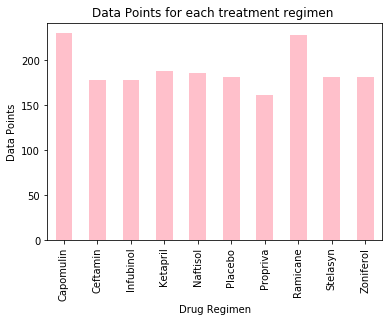

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#calculate the number of data points using group by on drug regimen and count function 
reg_data_points = combined_data_grouped.count()["Mouse ID"]

# Use DataFrame.plot() in order to create a bar chart of the data
reg_data_points.plot(kind="bar",  facecolor="pink")

#set chart title
plt.title("Data Points for each treatment regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()



## Bar plots-Matplotlib

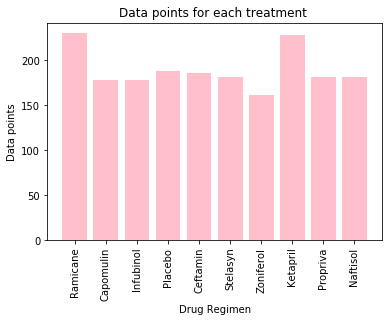

<Figure size 432x288 with 0 Axes>

In [4]:
## Generate a bar plot showing number of data points for each treatment regimen using pyplot

#define a list to hold the number and the value of data points
x_axis = np.arange(len(reg_data_points))+1
y_axis = reg_data_points

#crreat a list to hold the drug regimen
drug_regimen = combined_data["Drug Regimen"].drop_duplicates()


#create a bar plot using pyplot
plt.bar(x_axis, y_axis, color='pink', alpha=1, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation=90)

# Give our graph axis labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Data points")
plt.title("Data points for each treatment ")


#show chart and set layout
plt.show()
plt.tight_layout()


## Pie plots-pandas

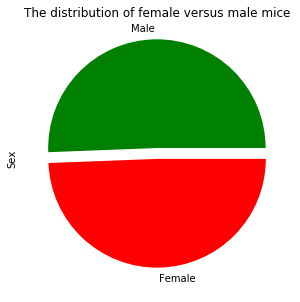

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#difine a list to hold the sex 
list_sex=["Female", "Male"]

#count the number of each sex using value.count
sex_distribution= combined_data.Sex.value_counts()

# Tells matplotlib to seperate the "feemale"and "male" section 
explode = (0.1, 0)

#showing pie plot of the sex distribution using pandas.Series.plot.pie
chart_pie = sex_distribution.plot.pie(y= list_sex, explode=explode, colors=["green", "red"], figsize=(5, 5))


# Give our graph axis labels and title
plt.title("The distribution of female versus male mice")

#show chart and set layout
plt.show()
plt.tight_layout()



## Pie plots-pyplot

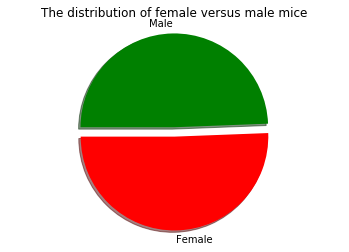

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
sizes = sex_distribution

# Labels for the sections of our pie chart
labels = list_sex

# The colors of each section of the pie chart
colors = ["red", "green"]

# Tells matplotlib to seperate the "feemale"and "male" section 
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=list_sex, explode=explode, colors=colors, shadow=True, startangle=180)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


# Give our graph axis labels and title
plt.title("The distribution of female versus male mice")

#show chart and set layout
plt.show()
plt.tight_layout()




## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the
#IQR and quantitatively determine if there are any potential outliers. 

# calculate the latest time point for each mouse
last_size = combined_data.groupby(["Mouse ID"]).max()

#reset the index of the previose data frame
last_size_reset = last_size.reset_index()

#Merge this dataframe with the first one to calculate the final  tumore valume 
merge_last_combined = last_size_reset[["Timepoint", "Mouse ID"]].merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")

# seperate the data of each interested regimen
capumulin_volume = marge_last_combined.loc[merge_last_combined["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane_volume = marge_last_combined.loc[merge_last_combined["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol_volume = marge_last_combined.loc[merge_last_combined["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ceftamin_volume = marge_last_combined.loc[merge_last_combined["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]


#calculte the outliers of capmolin 
capumulin_qurtiles = capumulin_volume.quantile([0.25,0.5,0.75])
capumulin_lowerq = capumulin_qurtiles[0.25]
capumulin_upperq = capumulin_qurtiles[0.75]
capumulin_iqr = capumulin_upperq - capumulin_lowerq
capumulin_lower_bound = capumulin_lowerq - (1.5*capumulin_iqr)
capumulin_upper_bound = capumulin_upperq + (1.5*capumulin_iqr)

#print out the results for capomulin  
print(f'The potential outliers for capomulin:  {capumulin_volume.loc[(capumulin_volume<capumulin_lower_bound)|(capumulin_volume> capumulin_upper_bound)]}')

#calculte the outliers of Ramicane 
ramicane_qurtiles = ramicane_volume.quantile([0.25,0.5,0.75])
ramicane_lowerq = ramicane_qurtiles[0.25]
ramicane_upperq = ramicane_qurtiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

#print out the results for Ramicane  
print(f'The potential outliers for ramicane: {ramicane_volume.loc[(ramicane_volume < ramicane_lower_bound)|(ramicane_volume> ramicane_upper_bound)]}')

#calculte the outliers of Infubinol 
infubinol_qurtiles = infubinol_volume.quantile([0.25,0.5,0.75])
infubinol_lowerq = infubinol_qurtiles[0.25]
infubinol_upperq = infubinol_qurtiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

#print out the results for Infubinol  
print(f'The potential outliers for infubinol: {infubinol_volume.loc[(infubinol_volume < infubinol_lower_bound)|(infubinol_volume> infubinol_upper_bound)]}')


#calculte the outliers of Ceftamin 
ceftamin_qurtiles = ceftamin_volume.quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_qurtiles[0.25]
ceftamin_upperq = ceftamin_qurtiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

#print out the results for ceftamin  
print(f'The potential outliers for ceftamin: {ceftamin_volume.loc[(ceftamin_volume < ceftamin_lower_bound)|(ceftamin_volume> ceftamin_upper_bound)]}')


The potential outliers for capomulin:  Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The potential outliers for ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [70]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the
#IQR and quantitatively determine if there are any potential outliers. 

#Define a pivot table to find the final tumore volume(final_tumor_volume)
tumor_volume = combined_data.pivot_table(values="Tumor Volume (mm3)", index = "Timepoint", columns="Drug Regimen")

# remove less interested column 
tumor_volume_limited = tumor_volume[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

#grap the last column of the previous table as a final volume
final_tumore_valume = tumor_volume_limited.iloc[-1,:]

#make a datafram to make it prety!!!
final_tumore_valume_df = final_tumore_valume.to_frame()

#change the name of column to someting meaningfull
final_tumore_valume_df_final = final_tumore_valume_df.rename(columns={45:"final tumor volume"})

final_tumore_valume_df_final

,final tumor volume
Drug Regimen,
Capomulin,36.236114
Ramicane,34.955595
Infubinol,65.755562
Ceftamin,64.132421


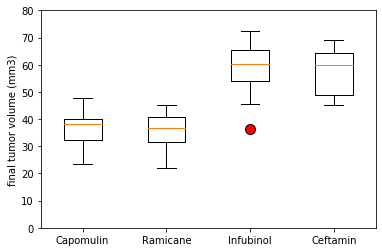

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#outliers = dic(markerface)
labels= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
flierprops = {'markersize' : 10, 'markerfacecolor' : 'red'}

plt.boxplot([capumulin_volume, ramicane_volume, infubinol_volume, ceftamin_volume], labels= labels, flierprops=flierprops)
plt.ylim(0, 80)

plt.ylabel("final tumor volume (mm3)")
plt.show()

    


## Line and scatter plots

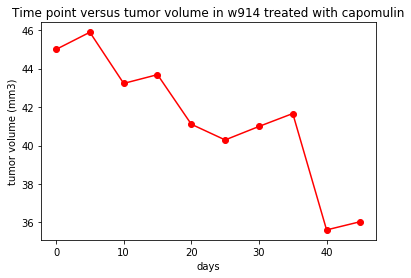

<Figure size 432x288 with 0 Axes>

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#seperate Capomulin data from the rest of datafram 
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]

#Randomly select an mouse ID
capomulin_ID = random.choice(capomulin_df['Mouse ID'].unique().tolist())

#seperate the selcetd capomulin ID from the rest of capomulin_df 
selected_capomulin_df = combined_data.loc[combined_data["Mouse ID"]==capomulin_ID,:]



#create a plot 
plt.plot(selected_capomulin_df['Timepoint'],
selected_capomulin_df['Tumor Volume (mm3)'],
        marker = 'o',
       color = 'red')

# Give our graph axis labels and title
plt.title(f'Time point versus tumor volume in {capomulin_ID} treated with capomulin' )
plt.ylabel('tumor volume (mm3)')
plt.xlabel('days')

#show chart and set layout
plt.show()
plt.tight_layout()






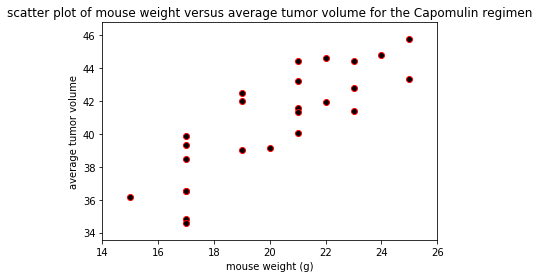

<Figure size 432x288 with 0 Axes>

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#calculate the mean of tumor volume and weight 
mean_capomulin_df = capomulin_df.groupby('Mouse ID').mean()

#create the scatter plot 
plt.scatter(mean_capomulin_df["Weight (g)"],
            mean_capomulin_df["Tumor Volume (mm3)"],
            facecolors = "black", 
            edgecolors = "red",
             )

# Give our graph axis labels and title                          
plt.title("scatter plot of mouse weight versus average tumor volume for the Capomulin regimen")
plt.ylabel('average tumor volume')
plt.xlabel('mouse weight (g)')

#describe the limitation for axis
plt.ylim(mean_capomulin_df['Tumor Volume (mm3)'].min() - 1, 
         mean_capomulin_df['Tumor Volume (mm3)'].max() + 1)
plt.xlim(mean_capomulin_df['Weight (g)'].min() - 1,
         mean_capomulin_df['Weight (g)'].max() + 1)

                              

#show chart and set layout
plt.show()
plt.tight_layout()



Text(18, 36, 'y = 0.95x + 21.55')

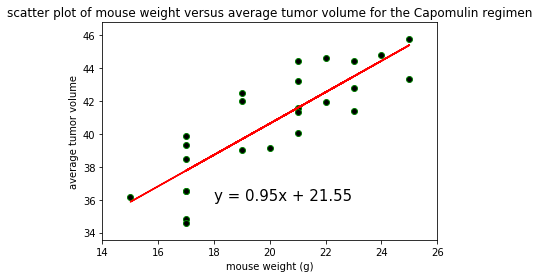

In [74]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
#the Capomulin regimen

#creat x and y axis
x_axis = mean_capomulin_df["Weight (g)"]
y_axis = mean_capomulin_df["Tumor Volume (mm3)"]

#calculate inear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

#the equation of linier regression 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#copy the scatter plot code here!
plt.scatter(mean_capomulin_df["Weight (g)"],
            mean_capomulin_df["Tumor Volume (mm3)"],
            facecolors = "black", 
            edgecolors = "green",
             )


#Line plot of regrresusion 
plt.plot(x_axis, regress_values,"r-")


# Give our graph axis labels and title                          
plt.title("scatter plot of mouse weight versus average tumor volume for the Capomulin regimen")
plt.ylabel('average tumor volume')
plt.xlabel('mouse weight (g)')

#describe the limitation for axis
plt.ylim(mean_capomulin_df['Tumor Volume (mm3)'].min() - 1, 
         mean_capomulin_df['Tumor Volume (mm3)'].max() + 1)
plt.xlim(mean_capomulin_df['Weight (g)'].min() - 1,
         mean_capomulin_df['Weight (g)'].max() + 1)

#write the equation on the scattered plot
plt.annotate(line_eq, (18,36), fontsize=15,)
